In [5]:
import requests
from bs4 import BeautifulSoup

url = "https://www.estesparkweather.net/archive_reports.php?date=202005"
response = requests.get(url)
print(response)

print(response.content[:500])

soup = BeautifulSoup(response.content,'html.parser')

table_data = soup.find_all('table')

print(table_data[0])

table_data[0].text





<Response [200]>
b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<!-- DW6 -->\n<head>\n<!-- Copyright 2005 Macromedia, Inc. All rights reserved. -->\n<meta http-equiv="Refresh" content="300" />\n<meta http-equiv="Pragma" content="no-cache" />\n<meta http-equiv="Cache-Control" content="no-cache" />\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n<meta name="ICBM" content="37.27465, -122.'
<table border="0" cellpadding="3" cellspacing="0">
<tr class="table-top">
<td colspan="2">May 1 Average and Extremes</td>
</tr>
<tr class="column-light">
<td>Average temperature</td><td> 57.8°F</td>
</tr>
<tr class="column-dark">
<td>Average humidity</td><td> 45%</td>
</tr>
<tr class="column-light">
<td>Average dewpoint</td><td> 33.9°F</td>
</tr>
<tr class="column-dark">
<td>Average barometer</td><td> 29.6 in.</td>
</tr>
<tr class="column-light">
<td>Average windspe

In [6]:
table_data[0].text

'\n\nMay 1 Average and Extremes\n\n\nAverage temperature 57.8°F\n\n\nAverage humidity 45%\n\n\nAverage dewpoint 33.9°F\n\n\nAverage barometer 29.6 in.\n\n\nAverage windspeed 5.2 mph\n\n\nAverage gustspeed 8.0 mph\n\n\nAverage direction 238° (WSW)\n\n\nRainfall for month 0.00 in.\n\n\nRainfall for year 2.40 in.\n\n\nMaximum rain per minute 0.00 in. on day 01 at time 00:00\n\n\nMaximum temperature 71.8°F on day 01 at time 14:41\n\n\nMinimum temperature 41.5°F on day 01 at time 06:24\n\n\nMaximum humidity 83% on day 01 at time 00:00\n\n\nMinimum humidity 19% on day 01 at time 14:07\n\n\nMaximum pressure 29.724 in. on day 01 at time 22:22\n\n\nMinimum pressure 29.515 in. on day 01 at time 16:13\n\n\nMaximum windspeed 18.4 mph on day 01 at time 21:02\n\n\nMaximum gust speed 29.9 mph  from 063 °(ENE) on day 01 at time 20:57\n\n\nMaximum heat index 76.6°F on day 01 at time 15:57\n\n'

In [36]:
import re
from datetime import datetime

In [37]:
table_data[0].text.splitlines()

['',
 '',
 'May 1 Average and Extremes',
 '',
 '',
 'Average temperature 57.8°F',
 '',
 '',
 'Average humidity 45%',
 '',
 '',
 'Average dewpoint 33.9°F',
 '',
 '',
 'Average barometer 29.6 in.',
 '',
 '',
 'Average windspeed 5.2 mph',
 '',
 '',
 'Average gustspeed 8.0 mph',
 '',
 '',
 'Average direction 238° (WSW)',
 '',
 '',
 'Rainfall for month 0.00 in.',
 '',
 '',
 'Rainfall for year 2.40 in.',
 '',
 '',
 'Maximum rain per minute 0.00 in. on day 01 at time 00:00',
 '',
 '',
 'Maximum temperature 71.8°F on day 01 at time 14:41',
 '',
 '',
 'Minimum temperature 41.5°F on day 01 at time 06:24',
 '',
 '',
 'Maximum humidity 83% on day 01 at time 00:00',
 '',
 '',
 'Minimum humidity 19% on day 01 at time 14:07',
 '',
 '',
 'Maximum pressure 29.724 in. on day 01 at time 22:22',
 '',
 '',
 'Minimum pressure 29.515 in. on day 01 at time 16:13',
 '',
 '',
 'Maximum windspeed 18.4 mph on day 01 at time 21:02',
 '',
 '',
 'Maximum gust speed 29.9 mph  from 063 °(ENE) on day 01 at time 20:57',

In [38]:
list(filter(None, table_data[0].text.splitlines()))

['May 1 Average and Extremes',
 'Average temperature 57.8°F',
 'Average humidity 45%',
 'Average dewpoint 33.9°F',
 'Average barometer 29.6 in.',
 'Average windspeed 5.2 mph',
 'Average gustspeed 8.0 mph',
 'Average direction 238° (WSW)',
 'Rainfall for month 0.00 in.',
 'Rainfall for year 2.40 in.',
 'Maximum rain per minute 0.00 in. on day 01 at time 00:00',
 'Maximum temperature 71.8°F on day 01 at time 14:41',
 'Minimum temperature 41.5°F on day 01 at time 06:24',
 'Maximum humidity 83% on day 01 at time 00:00',
 'Minimum humidity 19% on day 01 at time 14:07',
 'Maximum pressure 29.724 in. on day 01 at time 22:22',
 'Minimum pressure 29.515 in. on day 01 at time 16:13',
 'Maximum windspeed 18.4 mph on day 01 at time 21:02',
 'Maximum gust speed 29.9 mph  from 063 °(ENE) on day 01 at time 20:57',
 'Maximum heat index 76.6°F on day 01 at time 15:57']

In [42]:
outer_data_list = []
for data in table_data[:31]:
    value = list(filter(None, data.text.splitlines()))
    outer_data_list.append(value)            

In [45]:
outer_data_list[0]

['May 1 Average and Extremes',
 'Average temperature 57.8°F',
 'Average humidity 45%',
 'Average dewpoint 33.9°F',
 'Average barometer 29.6 in.',
 'Average windspeed 5.2 mph',
 'Average gustspeed 8.0 mph',
 'Average direction 238° (WSW)',
 'Rainfall for month 0.00 in.',
 'Rainfall for year 2.40 in.',
 'Maximum rain per minute 0.00 in. on day 01 at time 00:00',
 'Maximum temperature 71.8°F on day 01 at time 14:41',
 'Minimum temperature 41.5°F on day 01 at time 06:24',
 'Maximum humidity 83% on day 01 at time 00:00',
 'Minimum humidity 19% on day 01 at time 14:07',
 'Maximum pressure 29.724 in. on day 01 at time 22:22',
 'Minimum pressure 29.515 in. on day 01 at time 16:13',
 'Maximum windspeed 18.4 mph on day 01 at time 21:02',
 'Maximum gust speed 29.9 mph  from 063 °(ENE) on day 01 at time 20:57',
 'Maximum heat index 76.6°F on day 01 at time 15:57']

In [40]:
import pandas as pd

In [41]:
columns = ['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Average gustspeed', 'Average direction', 'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute', 'Maximum temperature', 'Minimum temperature', 'Maximum humidity', 
           'Minimum humidity', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index']

In [47]:
outer_data_list[0][10].split()[:5]

['Maximum', 'rain', 'per', 'minute', '0.00']

In [48]:
re.findall("\d+", str(outer_data_list[0][10].split()[:5]))

['0', '00']

In [49]:
'.'.join(re.findall("\d+",str(outer_data_list[0][10].split()[:5])))

'0.00'

In [50]:
outer_data_list

[['May 1 Average and Extremes',
  'Average temperature 57.8°F',
  'Average humidity 45%',
  'Average dewpoint 33.9°F',
  'Average barometer 29.6 in.',
  'Average windspeed 5.2 mph',
  'Average gustspeed 8.0 mph',
  'Average direction 238° (WSW)',
  'Rainfall for month 0.00 in.',
  'Rainfall for year 2.40 in.',
  'Maximum rain per minute 0.00 in. on day 01 at time 00:00',
  'Maximum temperature 71.8°F on day 01 at time 14:41',
  'Minimum temperature 41.5°F on day 01 at time 06:24',
  'Maximum humidity 83% on day 01 at time 00:00',
  'Minimum humidity 19% on day 01 at time 14:07',
  'Maximum pressure 29.724 in. on day 01 at time 22:22',
  'Minimum pressure 29.515 in. on day 01 at time 16:13',
  'Maximum windspeed 18.4 mph on day 01 at time 21:02',
  'Maximum gust speed 29.9 mph  from 063 °(ENE) on day 01 at time 20:57',
  'Maximum heat index 76.6°F on day 01 at time 15:57'],
 ['May 2 Average and Extremes',
  'Average temperature 47.1°F',
  'Average humidity 83%',
  'Average dewpoint 42.0

In [55]:
day_data_list = []
for inner_data_list in outer_data_list:
    numeric_values = []
    for day_data in inner_data_list[1:]:
        d ='.'.join(re.findall("\d+",str(day_data.split()[:5])))
        numeric_values.append(d)
    day_data_list.append(numeric_values)   

In [56]:
day_data_list[0]

['57.8',
 '45',
 '33.9',
 '29.6',
 '5.2',
 '8.0',
 '238',
 '0.00',
 '2.40',
 '0.00',
 '71.8',
 '41.5',
 '83',
 '19',
 '29.724',
 '29.515',
 '18.4',
 '29.9',
 '76.6']

In [57]:
import pandas as pd

In [ ]:
columns = ['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Average gustspeed', 'Average direction', 'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute', 'Maximum temperature', 'Minimum temperature', 'Maximum humidity', 
           'Minimum humidity', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index']

In [58]:
weather_data = pd.DataFrame(day_data_list, columns = columns)

In [59]:
weather_data.head()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,57.8,45,33.9,29.6,5.2,8.0,238,0.00,2.40,0.00,71.8,41.5,83,19,29.724,29.515,18.4,29.9,76.6
1,47.1,83,42.0,29.7,3.1,5.0,16,0.30,2.70,0.02,57.3,39.9,95,60,29.881,29.666,15.0,19.6,57.3
2,51.6,59,36.4,29.7,4.9,7.5,244,0.33,2.73,0.01,65.4,36.1,93,29,29.876,29.620,19.6,26.5,65.4
3,45.1,58,28.9,29.8,7.6,11.8,248,0.37,2.77,0.01,52.2,38.5,94,28,30.024,29.604,25.3,36.8,52.2
4,48.7,24,12.2,30.0,6.3,9.7,241,0.37,2.77,0.00,62.3,37.9,50,12,30.128,29.942,18.4,26.5,62.3


In [65]:
weather_data['Date'] = pd.date_range('2021-05-01', '2021-05-31')

In [66]:
weather_data.head()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index,Date
0,57.8,45,33.9,29.6,5.2,8.0,238,0.00,2.40,0.00,71.8,41.5,83,19,29.724,29.515,18.4,29.9,76.6,2021-05-01
1,47.1,83,42.0,29.7,3.1,5.0,16,0.30,2.70,0.02,57.3,39.9,95,60,29.881,29.666,15.0,19.6,57.3,2021-05-02
2,51.6,59,36.4,29.7,4.9,7.5,244,0.33,2.73,0.01,65.4,36.1,93,29,29.876,29.620,19.6,26.5,65.4,2021-05-03
3,45.1,58,28.9,29.8,7.6,11.8,248,0.37,2.77,0.01,52.2,38.5,94,28,30.024,29.604,25.3,36.8,52.2,2021-05-04
4,48.7,24,12.2,30.0,6.3,9.7,241,0.37,2.77,0.00,62.3,37.9,50,12,30.128,29.942,18.4,26.5,62.3,2021-05-05


In [80]:
weather_data[columns] = weather_data[columns].apply(pd.to_numeric)

In [87]:
weather_data.rename(columns = lambda x: x.replace(" ", "_").lower(),
          inplace = True)
weather_data.keys()

Index(['average_temperature', 'average_humidity', 'average_dewpoint',
       'average_barometer', 'average_windspeed', 'average_gustspeed',
       'average_direction', 'rainfall_for_month', 'rainfall_for_year',
       'maximum_rain_per_minute', 'maximum_temperature', 'minimum_temperature',
       'maximum_humidity', 'minimum_humidity', 'maximum_pressure',
       'minimum_pressure', 'maximum_windspeed', 'maximum_gust_speed',
       'maximum_heat_index', 'date'],
      dtype='object')

In [90]:
humidity_cols = ['average_humidity', 'minimum_humidity']

weather_data[humidity_cols] = weather_data[humidity_cols].apply(lambda x: x/100)

In [91]:
weather_data.head()

,average_temperature,average_humidity,average_dewpoint,average_barometer,average_windspeed,average_gustspeed,average_direction,rainfall_for_month,rainfall_for_year,maximum_rain_per_minute,maximum_temperature,minimum_temperature,maximum_humidity,minimum_humidity,maximum_pressure,minimum_pressure,maximum_windspeed,maximum_gust_speed,maximum_heat_index,date
0,57.8,0.45,33.9,29.6,5.2,8.0,238,0.00,2.40,0.00,71.8,41.5,83,0.19,29.724,29.515,18.4,29.9,76.6,2021-05-01
1,47.1,0.83,42.0,29.7,3.1,5.0,16,0.30,2.70,0.02,57.3,39.9,95,0.60,29.881,29.666,15.0,19.6,57.3,2021-05-02
2,51.6,0.59,36.4,29.7,4.9,7.5,244,0.33,2.73,0.01,65.4,36.1,93,0.29,29.876,29.620,19.6,26.5,65.4,2021-05-03
3,45.1,0.58,28.9,29.8,7.6,11.8,248,0.37,2.77,0.01,52.2,38.5,94,0.28,30.024,29.604,25.3,36.8,52.2,2021-05-04
4,48.7,0.24,12.2,30.0,6.3,9.7,241,0.37,2.77,0.00,62.3,37.9,50,0.12,30.128,29.942,18.4,26.5,62.3,2021-05-05


In [112]:
weather_data.to_csv("weather_data.csv", index=False)

In [99]:
import sqlite3

conn = sqlite3.connect('weather_data.db')
print("Database connection opened.")

In [107]:
conn = sqlite3.connect('weather_data.db') 
print("Database connection opened.")

Database connection opened.


In [101]:
try:
    conn.execute('''
        CREATE TABLE Weather
        (
        average_temperature         Float DEFAULT 0,
        average_humidity            Float DEFAULT 0,
        average_dewpoint            Float DEFAULT 0,
        average_barometer           Float DEFAULT 0,
        average_windspeed           Float DEFAULT 0,
        average_gustspeed           Float DEFAULT 0,
        average_direction           Float DEFAULT 0,
        rainfall_for_month          Float DEFAULT 0, 
        rainfall_for_year           Float DEFAULT 0, 
        maximum_rain_per_minute     Float DEFAULT 0, 
        maximum_temperature         Float DEFAULT 0,
        minimum_temperature         Float DEFAULT 0, 
        maximum_humidity            Float DEFAULT 0, 
        minimum_humidity            Float DEFAULT 0, 
        maximum_pressure            Float DEFAULT 0, 
        minimum_pressure            Float DEFAULT 0,
        maximum_windspeed           Float DEFAULT 0, 
        maximum_gust_speed          Float DEFAULT 0, 
        maximum_heat_index          Float DEFAULT 0, 
        date                        timestamp);''')
    
    print ("Weather table has been created successfully");
    
except Exception as e: 
    print(str(e))
    print('Table Creation Failed.')
    
finally:
    conn.close() 

Weather table has been created successfully


In [102]:
weather_data_list = weather_data.astype('str').values.tolist()

In [103]:
conn = sqlite3.connect('weather_data.db')

In [104]:
cur = conn.cursor()

In [109]:
try:
    # will use ? sign to represent each column names inside VALUE().
    cur.executemany("INSERT INTO Weather(average_temperature, average_humidity, average_dewpoint,\
                    average_barometer, average_windspeed, average_gustspeed, average_direction,\
                    rainfall_for_month, rainfall_for_year, maximum_rain_per_minute, maximum_temperature,\
                    minimum_temperature, maximum_humidity, minimum_humidity, maximum_pressure, minimum_pressure,\
                    maximum_windspeed, maximum_gust_speed, maximum_heat_index, date) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", weather_data_list)
    conn.commit()
    print('Weather Data Inserted Successfully')
    
except Exception as e:
    # Print the exception error message
    print(str(e))
    print('Weather Data Insertion Failed')
    
finally:
    # finally close the database connection
    conn.close()

Cannot operate on a closed database.
Weather Data Insertion Failed


In [114]:
# Import pandas for data manipulation
import pandas as pd

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import sqlite3 for performing SQL queries
import sqlite3

%matplotlib inline

In [115]:
weather_df = pd.read_csv("weather_data.csv")

In [116]:
weather_df.head()

,average_temperature,average_humidity,average_dewpoint,average_barometer,average_windspeed,average_gustspeed,average_direction,rainfall_for_month,rainfall_for_year,maximum_rain_per_minute,maximum_temperature,minimum_temperature,maximum_humidity,minimum_humidity,maximum_pressure,minimum_pressure,maximum_windspeed,maximum_gust_speed,maximum_heat_index,date
0,57.8,0.45,33.9,29.6,5.2,8.0,238,0.00,2.40,0.00,71.8,41.5,83,0.19,29.724,29.515,18.4,29.9,76.6,2021-05-01
1,47.1,0.83,42.0,29.7,3.1,5.0,16,0.30,2.70,0.02,57.3,39.9,95,0.60,29.881,29.666,15.0,19.6,57.3,2021-05-02
2,51.6,0.59,36.4,29.7,4.9,7.5,244,0.33,2.73,0.01,65.4,36.1,93,0.29,29.876,29.620,19.6,26.5,65.4,2021-05-03
3,45.1,0.58,28.9,29.8,7.6,11.8,248,0.37,2.77,0.01,52.2,38.5,94,0.28,30.024,29.604,25.3,36.8,52.2,2021-05-04
4,48.7,0.24,12.2,30.0,6.3,9.7,241,0.37,2.77,0.00,62.3,37.9,50,0.12,30.128,29.942,18.4,26.5,62.3,2021-05-05


In [117]:
weather_df.tail()

,average_temperature,average_humidity,average_dewpoint,average_barometer,average_windspeed,average_gustspeed,average_direction,rainfall_for_month,rainfall_for_year,maximum_rain_per_minute,maximum_temperature,minimum_temperature,maximum_humidity,minimum_humidity,maximum_pressure,minimum_pressure,maximum_windspeed,maximum_gust_speed,maximum_heat_index,date
26,58.3,0.51,39.1,29.7,3.2,5.0,284,0.91,3.31,0.00,68.4,41.7,78,0.28,29.785,29.655,15.0,23.0,77.0,2021-05-27
27,54.4,0.68,43.4,29.9,2.9,5.2,46,0.91,3.31,0.00,66.0,37.9,94,0.35,30.005,29.773,13.8,18.4,66.0,2021-05-28
28,63.1,0.53,42.7,29.8,2.7,4.8,184,0.91,3.31,0.00,79.3,40.8,93,0.21,29.990,29.745,15.0,23.0,78.6,2021-05-29
29,62.2,0.56,44.7,29.7,3.2,5.1,289,0.95,3.35,0.01,74.9,49.1,89,0.28,29.777,29.666,17.3,20.7,77.5,2021-05-30
30,62.8,0.53,42.9,29.7,5.1,7.7,230,1.00,3.40,0.01,78.4,45.7,94,0.23,29.761,29.664,17.3,29.9,78.0,2021-05-31


In [118]:
weather_df.shape


(31, 20)

In [119]:
weather_df.isnull().sum()


average_temperature        0
average_humidity           0
average_dewpoint           0
average_barometer          0
average_windspeed          0
average_gustspeed          0
average_direction          0
rainfall_for_month         0
rainfall_for_year          0
maximum_rain_per_minute    0
maximum_temperature        0
minimum_temperature        0
maximum_humidity           0
minimum_humidity           0
maximum_pressure           0
minimum_pressure           0
maximum_windspeed          0
maximum_gust_speed         0
maximum_heat_index         0
date                       0
dtype: int64

In [120]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_temperature      31 non-null     float64
 1   average_humidity         31 non-null     float64
 2   average_dewpoint         31 non-null     float64
 3   average_barometer        31 non-null     float64
 4   average_windspeed        31 non-null     float64
 5   average_gustspeed        31 non-null     float64
 6   average_direction        31 non-null     int64  
 7   rainfall_for_month       31 non-null     float64
 8   rainfall_for_year        31 non-null     float64
 9   maximum_rain_per_minute  31 non-null     float64
 10  maximum_temperature      31 non-null     float64
 11  minimum_temperature      31 non-null     float64
 12  maximum_humidity         31 non-null     int64  
 13  minimum_humidity         31 non-null     float64
 14  maximum_pressure         31 

In [121]:
weather_df.describe()


,average_temperature,average_humidity,average_dewpoint,average_barometer,average_windspeed,average_gustspeed,average_direction,rainfall_for_month,rainfall_for_year,maximum_rain_per_minute,maximum_temperature,minimum_temperature,maximum_humidity,minimum_humidity,maximum_pressure,minimum_pressure,maximum_windspeed,maximum_gust_speed,maximum_heat_index
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,50.845161,0.541613,31.393548,29.741935,4.490323,7.112903,173.161290,0.597742,2.997742,0.004194,64.393548,36.070968,84.774194,0.271935,29.866613,29.652323,17.835484,25.587097,65.209677
std,7.403370,0.168505,8.829871,0.185785,2.074023,2.888453,101.907179,0.245882,0.245882,0.005642,9.022192,5.996009,13.435549,0.157214,0.183888,0.192941,4.508033,6.436860,9.828881
min,36.800000,0.200000,11.600000,29.300000,2.000000,3.600000,1.000000,0.000000,2.400000,0.000000,50.400000,24.500000,44.000000,0.080000,29.483000,29.193000,10.400000,15.000000,50.400000
25%,45.800000,0.435000,26.950000,29.600000,3.100000,5.050000,57.000000,0.370000,2.770000,0.000000,56.200000,30.600000,79.000000,0.155000,29.742000,29.524000,15.000000,20.700000,56.200000
50%,51.600000,0.550000,32.300000,29.700000,3.800000,6.100000,228.000000,0.660000,3.060000,0.000000,65.400000,36.500000,90.000000,0.240000,29.881000,29.661000,17.300000,23.000000,65.400000
75%,56.350000,0.630000,37.300000,29.900000,5.250000,8.150000,244.000000,0.780000,3.180000,0.010000,71.650000,39.300000,94.000000,0.340000,30.010000,29.765000,21.300000,31.650000,76.800000
max,63.100000,0.840000,44.700000,30.000000,10.100000,15.200000,290.000000,1.000000,3.400000,0.020000,79.300000,49.100000,97.000000,0.660000,30.138000,30.001000,27.600000,36.800000,78.600000


In [122]:
max_avg_temp = weather_df["average_temperature"].max()
print(f"Highest average temperature recorded in the month is {max_avg_temp} Fahrenheit.")

Highest average temperature recorded in the month is 63.1 Fahrenheit.


In [123]:
min_avg_temp = weather_df["average_temperature"].min()
print(f"Lowest average temperature recorded in the month is {min_avg_temp} Fahrenheit.")

Lowest average temperature recorded in the month is 36.8 Fahrenheit.


<AxesSubplot:>

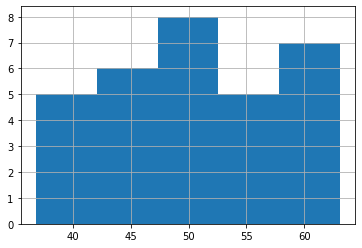

In [126]:
weather_df['average_temperature'].hist(bins=5)

<AxesSubplot:>

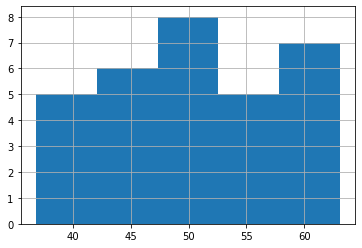

In [125]:
weather_df['average_temperature'].hist(bins=5)

<AxesSubplot:ylabel='average_temperature'>

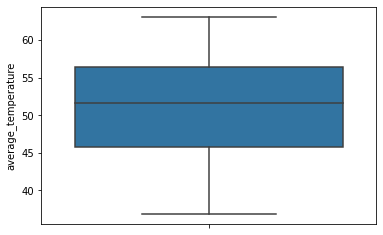

In [134]:
sns.boxplot(y=weather_df['average_temperature'], orient='v')

<AxesSubplot:ylabel='average_temperature'>

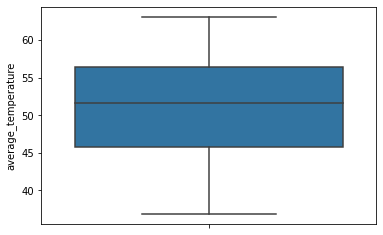

In [133]:
sns.boxplot(y=weather_df['average_temperature'], orient='v')

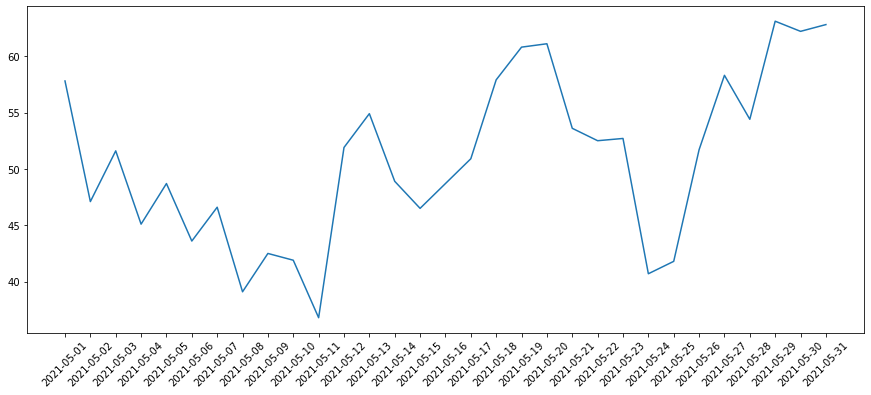

In [135]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
plt.plot(weather_df['date'], weather_df['average_temperature'])

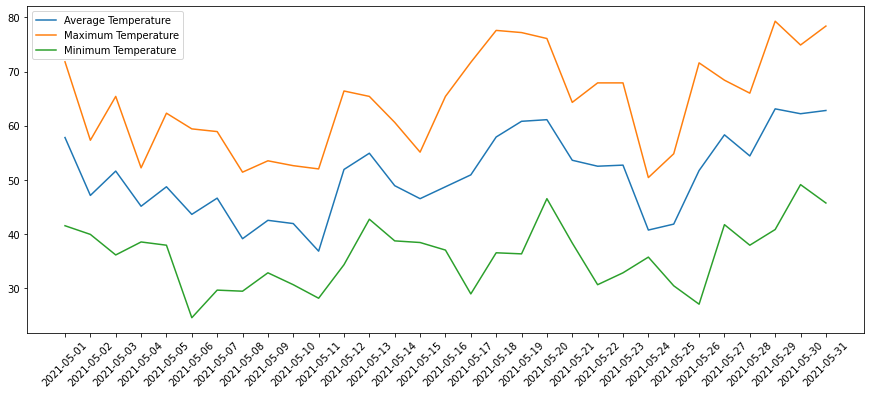

In [136]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
plt.plot(weather_df['date'], weather_df['average_temperature'])
plt.plot(weather_df['date'], weather_df['maximum_temperature'])
plt.plot(weather_df['date'], weather_df['minimum_temperature'])
plt.legend(['Average Temperature', 'Maximum Temperature', 'Minimum Temperature'])

In [ ]:
#Data pre-processing

In [1]:
import pandas as pd
weather_df = pd.read_csv("weather_data.csv")
weather_df.head()

,average_temperature,average_humidity,average_dewpoint,average_barometer,average_windspeed,average_gustspeed,average_direction,rainfall_for_month,rainfall_for_year,maximum_rain_per_minute,maximum_temperature,minimum_temperature,maximum_humidity,minimum_humidity,maximum_pressure,minimum_pressure,maximum_windspeed,maximum_gust_speed,maximum_heat_index,date
0,57.8,0.45,33.9,29.6,5.2,8.0,238,0.00,2.40,0.00,71.8,41.5,83,0.19,29.724,29.515,18.4,29.9,76.6,2021-05-01
1,47.1,0.83,42.0,29.7,3.1,5.0,16,0.30,2.70,0.02,57.3,39.9,95,0.60,29.881,29.666,15.0,19.6,57.3,2021-05-02
2,51.6,0.59,36.4,29.7,4.9,7.5,244,0.33,2.73,0.01,65.4,36.1,93,0.29,29.876,29.620,19.6,26.5,65.4,2021-05-03
3,45.1,0.58,28.9,29.8,7.6,11.8,248,0.37,2.77,0.01,52.2,38.5,94,0.28,30.024,29.604,25.3,36.8,52.2,2021-05-04
4,48.7,0.24,12.2,30.0,6.3,9.7,241,0.37,2.77,0.00,62.3,37.9,50,0.12,30.128,29.942,18.4,26.5,62.3,2021-05-05


In [5]:
df = weather_df[['average_temperature', 'maximum_temperature', 'minimum_temperature']]
df.head()                 

,average_temperature,maximum_temperature,minimum_temperature
0,57.8,71.8,41.5
1,47.1,57.3,39.9
2,51.6,65.4,36.1
3,45.1,52.2,38.5
4,48.7,62.3,37.9


In [6]:
df.isnull().sum()

average_temperature    0
maximum_temperature    0
minimum_temperature    0
dtype: int64

In [7]:
df[df.duplicated()]

,average_temperature,maximum_temperature,minimum_temperature


In [9]:
import matplotlib.pyplot as plt

KeyError: 'minimum temperature'

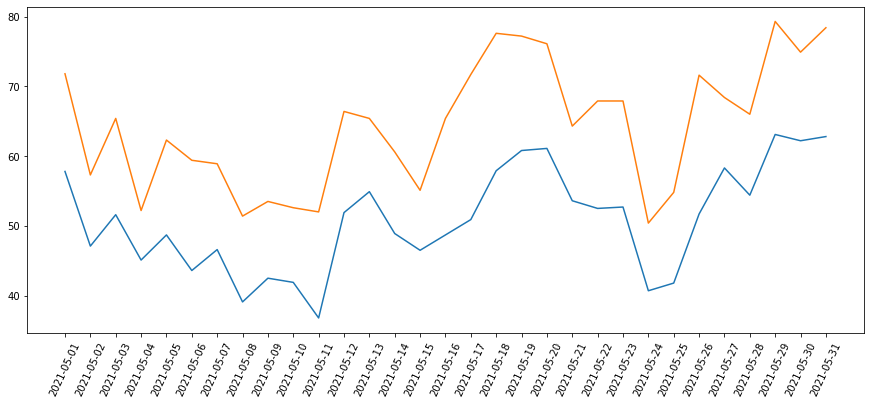

In [13]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=65)
plt.plot(weather_df['date'], df['average_temperature'])
plt.plot(weather_df['date'], df['maximum_temperature'])
plt.plot(weather_df['date'], df['minimum temperature'])
plt.legend(['Average Temperature', 'Maximum Temperature', 'Minimum Temperature'])
plt.show()

In [29]:
#Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
y = df[['average_temperature']]
x = df[['maximum_temperature', 'minimum_temperature']]

In [20]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
#Model Building and Training

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
x_train.iloc[-1,:]

maximum_temperature    58.9
minimum_temperature    29.6
Name: 6, dtype: float64

In [25]:
model.predict([[58.9, 29.6]])

array([[44.77001097]])

In [26]:
y_train.iloc[-1,:]

average_temperature    46.6
Name: 6, dtype: float64

In [28]:
#Model Evaluation

In [33]:
print(X_test)
print(y_test)

    maximum_temperature  minimum_temperature
27                 66.0                 37.9
15                 65.4                 37.0
23                 50.4                 35.7
17                 77.6                 36.5
8                  53.5                 32.8
9                  52.6                 30.6
29                 74.9                 49.1
24                 54.8                 30.4
12                 65.4                 42.7
0                  71.8                 41.5
    average_temperature
27                 54.4
15                 48.7
23                 40.7
17                 57.9
8                  42.5
9                  41.9
29                 62.2
24                 41.8
12                 54.9
0                  57.8


In [32]:
X_test.iloc[-1,:]

maximum_temperature    71.8
minimum_temperature    41.5
Name: 0, dtype: float64

In [34]:
model.predict([[71.8,41.5]])

array([[58.09473215]])

In [35]:
y_test.iloc[-1,:]

average_temperature    57.8
Name: 0, dtype: float64

In [36]:
from sklearn.metrics import mean_squared_error

In [39]:
training_set_predictions = model.predict(x_train)
print(training_set_predictions)

[[50.36364707]
 [52.94893351]
 [43.04445631]
 [49.56242391]
 [51.62251035]
 [52.00932305]
 [47.86481995]
 [51.68715561]
 [52.11684503]
 [43.92917864]
 [51.12239199]
 [55.92787516]
 [59.56788796]
 [64.15073324]
 [51.84695849]
 [39.73168875]
 [39.6042085 ]
 [45.80583788]
 [62.77021893]
 [62.95289471]
 [44.77001097]]


In [41]:
testing_set_predictions = model.predict(X_test)
print(testing_set_predictions)


[[52.80944184]
 [52.04999104]
 [41.61051118]
 [59.91292831]
 [42.49055419]
 [41.00870007]
 [63.20785523]
 [42.38232633]
 [54.34794879]
 [58.09473215]]


In [42]:
MSE_train = mean_squared_error(y_train, training_set_predictions)
MSE_test = mean_squared_error(y_test, testing_set_predictions)

In [43]:
print(f'The MSE for the training set predictions is: {MSE_train}')
print(f'The MSE for the testing set predictions is: {MSE_test}')

The MSE for the training set predictions is: 1.9038225620710771
The MSE for the testing set predictions is: 2.117423467529662


In [44]:
#Saving and Loadind models

In [45]:
import pickle

In [50]:
filepath = 'regression_model.sav'
pickle.dump(model, open(filepath, 'wb'))

In [51]:
loaded_model = pickle.load(open(filepath, 'rb'))

In [53]:
loaded_model.predict(X_test)

array([[52.80944184],
       [52.04999104],
       [41.61051118],
       [59.91292831],
       [42.49055419],
       [41.00870007],
       [63.20785523],
       [42.38232633],
       [54.34794879],
       [58.09473215]])